In [87]:
!pip install pydub
!pip install librosa

In [88]:
import pydub
import librosa 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

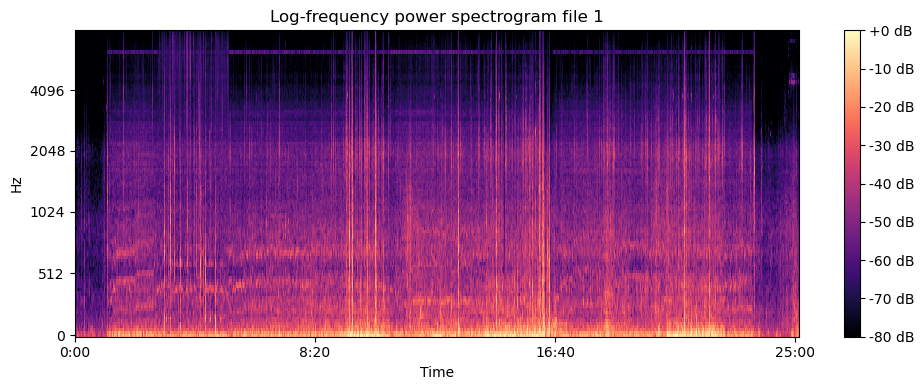

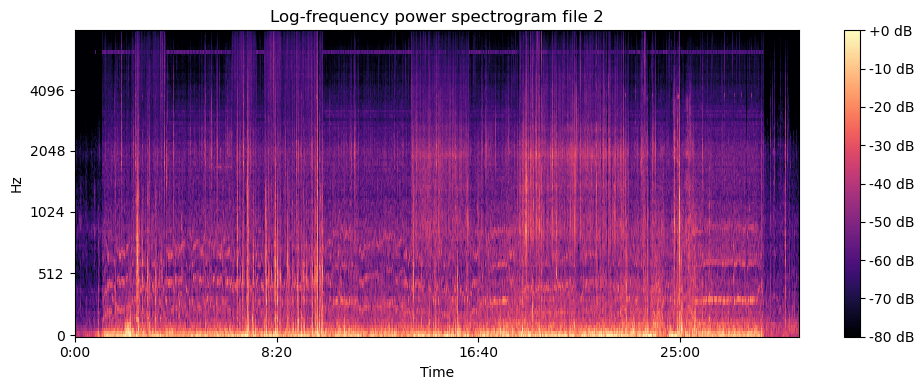

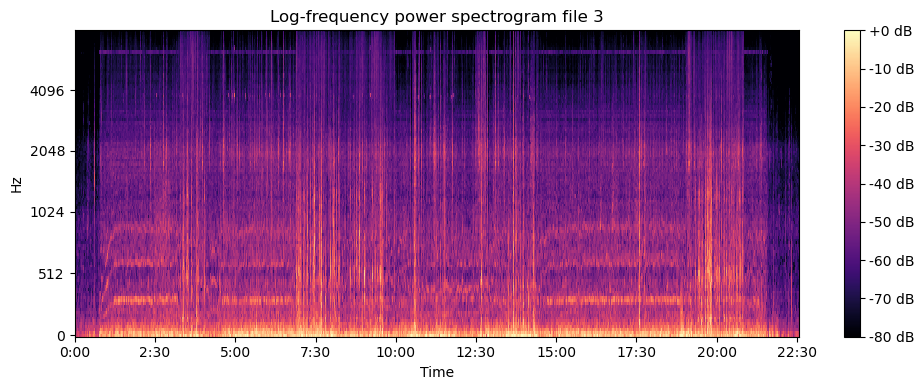

In [89]:
i=1 #Показываю спектрограммы аудио на основании которых и будет построена модель
while i<=3:
    file = f'DATA/{i}.wav'
    y, sr =librosa.load(file,sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log-frequency power spectrogram file {i}')
    plt.tight_layout()
    plt.show()
    i+=1

In [90]:
from pydub import AudioSegment
audio_file = AudioSegment.from_file('DATA/3.wav')
# длина аудиодорожки в миллисекундах (2 секунды, экспериментально было выяснено что это наиболее эффективно как и в скорости обработки так и для итогового рез-та)
track_length = 2000
# разбиение аудиофайла на аудиодорожки длиной в 2 секунды
audio_tracks = audio_file[::track_length]
# сохранение аудиодорожек в отдельные файлы
for i, track in enumerate(audio_tracks):
    track.export(f"DATA/AUDIO/audio_track3_{i}.wav", format="wav")


In [91]:
import librosa

In [92]:
def extract_features(file_name):
    y, sr = librosa.load(file_name)
    rmse = np.mean(librosa.feature.rms(y=y))
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40), axis=1)
    return np.concatenate([mfcc, np.array([chroma_stft, spec_cent, spec_bw, rolloff, zcr])])
    #Беру различные признаки спектрограммы
# Создание пустого DataFrame
columns = ['mfcc'+str(i) for i in range(1, 41)] + ['chroma_stft', 'spec_cent', 'spec_bw', 'rolloff', 'zcr']
df = pd.DataFrame(columns=columns)
i=0
# Добавление данных в таблицу
while i<=377:
    file_name = f'C:/Users/user/DATA/AUDIO/audio_track_{i}.wav'
    features = extract_features(file_name)
    df.loc[len(df)] = features
    i+=1
    

C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pit

In [93]:
df

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,chroma_stft,spec_cent,spec_bw,rolloff,zcr
0,-345.655182,119.394791,6.719993,38.717991,4.885798,20.949438,30.389219,3.646347,1.181923,9.346273,...,0.927840,-0.443009,1.354235,-1.176189,1.416150,0.719350,1101.236689,1955.397277,2661.825667,0.018751
1,-315.533600,120.375694,2.922027,41.196899,2.210457,19.067707,25.300955,1.615692,-0.637290,8.696959,...,1.469937,-0.608345,2.839823,-0.060877,0.852313,0.700203,1261.732641,1994.170853,3002.396787,0.026367
2,-326.304474,113.581345,-10.000307,28.439857,7.800366,20.891933,23.198298,2.773676,-3.574811,9.194585,...,2.005462,-0.869498,2.612391,-0.991642,1.302153,0.705475,1591.467176,2176.495369,3559.908742,0.043917
3,-325.208862,122.633171,-8.537357,27.060112,7.035260,19.868000,24.559237,2.578606,-3.814490,8.178975,...,3.635229,-0.175426,2.581249,-1.605687,1.704933,0.708292,1400.810071,2070.302138,3258.691406,0.033703
4,-293.073792,120.707420,-8.405794,33.700310,5.995312,19.722826,19.688581,2.594715,-0.927652,7.365408,...,3.424592,-0.034437,2.547391,-0.729937,1.305430,0.712337,1415.704691,2040.641695,3202.012055,0.034281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,-135.812698,135.016205,-13.109938,19.709475,16.002460,2.354189,30.096401,-2.565861,8.135245,3.101128,...,5.115877,-3.783436,6.649371,-4.792212,6.312698,0.706418,1825.141500,2551.709545,4513.681136,0.075689
374,-135.925552,150.046036,-18.037933,31.104973,9.228239,6.368079,25.088217,4.917630,4.797234,1.440771,...,4.973567,-2.144067,6.762934,-0.611176,6.876438,0.603122,1294.646489,1931.444216,2724.816474,0.047083
375,-126.511292,140.918854,-1.188684,24.554985,10.961757,3.660481,28.997892,7.071280,-1.886196,6.098003,...,5.820676,-0.246833,4.025812,-1.550554,4.893196,0.650246,1507.726313,2139.084922,3123.056977,0.047655
376,-174.316315,145.462402,2.809884,40.404396,18.828499,9.062504,30.689436,7.119614,5.026551,9.108065,...,5.958644,2.537765,5.945342,0.585003,4.762899,0.644802,1045.048339,1855.411720,2209.628401,0.025172


In [94]:
# Создание пустого DataFrame
columns = ['mfcc'+str(i) for i in range(1, 41)] + ['chroma_stft', 'spec_cent', 'spec_bw', 'rolloff', 'zcr']
df2 = pd.DataFrame(columns=columns)
i=0
# Добавление данных в таблицу
while i<=377:
    file_name = f'C:/Users/user/DATA/AUDIO/audio_track2_{i}.wav'
    features = extract_features(file_name)
    df2.loc[len(df2)] = features
    i+=1

C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pit

In [95]:
# Создание пустого DataFrame
columns = ['mfcc'+str(i) for i in range(1, 41)] + ['chroma_stft', 'spec_cent', 'spec_bw', 'rolloff', 'zcr']
df3 = pd.DataFrame(columns=columns)
i=0
# Добавление данных в таблицу
while i<=377:
    file_name = f'C:/Users/user/DATA/AUDIO/audio_track3_{i}.wav'
    features = extract_features(file_name)
    df3.loc[len(df3)] = features
    i+=1

C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\user\anaconda3\lib\site-packages\librosa\core\pit

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/user/DATA/AUDIO/audio_track3_339.wav'

In [96]:
df3=df3.drop(labels=[338],axis=0)
df3

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,chroma_stft,spec_cent,spec_bw,rolloff,zcr
0,-277.984467,107.542473,-1.292710,34.619366,9.920409,18.497942,22.588480,10.160831,-1.024438,10.635144,...,2.405774,-0.773341,2.660573,-1.502963,0.931052,0.697527,1746.319293,2259.530146,3825.361160,0.043698
1,-319.720581,132.852310,7.160704,24.518555,9.399090,19.979322,21.780733,7.760198,1.586073,8.929621,...,1.465187,-0.980386,0.807086,-0.889467,1.995433,0.666160,1259.249370,2050.429511,2741.152007,0.030088
2,-311.633484,136.572998,6.266941,27.589645,10.712600,20.986898,23.939720,9.370355,1.597512,9.179960,...,2.869355,-0.887271,0.734782,-1.452999,0.908964,0.610997,1148.294899,1950.116876,2426.692989,0.027770
3,-305.053894,145.320511,5.623535,26.015213,8.964343,17.684729,22.608210,7.289581,-0.002948,8.401034,...,2.151762,-1.041301,-0.534953,-2.790733,0.743502,0.639366,1074.478788,1841.548674,2125.723161,0.028674
4,-294.921661,129.622299,2.207044,29.364021,10.545584,21.596003,22.158070,8.364195,3.955947,10.775821,...,3.009347,-0.128901,2.129958,-1.690653,0.902841,0.726187,1181.398851,1952.154750,2581.633048,0.023993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-241.969849,102.496254,-7.038849,40.012764,-0.195955,21.786549,19.770002,7.942677,-3.155864,7.108466,...,0.972006,1.394926,2.086526,0.100578,1.604989,0.748125,1656.085560,2173.684108,3849.369444,0.044737
334,-263.380829,114.574905,-12.255863,40.991226,2.781709,14.733206,19.005522,5.777576,-2.932881,9.554067,...,3.135846,-0.492693,2.517978,0.489964,2.478907,0.721101,1585.404660,2063.636403,3521.421235,0.047666
335,-288.077026,107.134201,-12.957298,35.018448,7.861178,17.901146,20.570885,6.440145,-2.154841,10.439542,...,1.999270,0.178059,2.040778,-1.089283,3.837495,0.722596,1777.803272,2223.382448,3781.180967,0.057477
336,-234.354080,95.718483,-16.518291,32.418919,2.308111,15.848433,17.144455,5.853552,-1.797399,9.917712,...,2.348123,-0.513633,2.925041,-0.016141,2.852993,0.681513,2093.424081,2314.085174,4296.864056,0.070885


In [97]:
df.insert(45, "File",'1 file') #Создаем столбец показывающий откуда были взяты данные

In [98]:
df2.insert(45, "File",'2 file')

In [99]:
df3.insert(45, "File",'3 file')

In [100]:
df3

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc37,mfcc38,mfcc39,mfcc40,chroma_stft,spec_cent,spec_bw,rolloff,zcr,File
0,-277.984467,107.542473,-1.292710,34.619366,9.920409,18.497942,22.588480,10.160831,-1.024438,10.635144,...,-0.773341,2.660573,-1.502963,0.931052,0.697527,1746.319293,2259.530146,3825.361160,0.043698,3 file
1,-319.720581,132.852310,7.160704,24.518555,9.399090,19.979322,21.780733,7.760198,1.586073,8.929621,...,-0.980386,0.807086,-0.889467,1.995433,0.666160,1259.249370,2050.429511,2741.152007,0.030088,3 file
2,-311.633484,136.572998,6.266941,27.589645,10.712600,20.986898,23.939720,9.370355,1.597512,9.179960,...,-0.887271,0.734782,-1.452999,0.908964,0.610997,1148.294899,1950.116876,2426.692989,0.027770,3 file
3,-305.053894,145.320511,5.623535,26.015213,8.964343,17.684729,22.608210,7.289581,-0.002948,8.401034,...,-1.041301,-0.534953,-2.790733,0.743502,0.639366,1074.478788,1841.548674,2125.723161,0.028674,3 file
4,-294.921661,129.622299,2.207044,29.364021,10.545584,21.596003,22.158070,8.364195,3.955947,10.775821,...,-0.128901,2.129958,-1.690653,0.902841,0.726187,1181.398851,1952.154750,2581.633048,0.023993,3 file
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-241.969849,102.496254,-7.038849,40.012764,-0.195955,21.786549,19.770002,7.942677,-3.155864,7.108466,...,1.394926,2.086526,0.100578,1.604989,0.748125,1656.085560,2173.684108,3849.369444,0.044737,3 file
334,-263.380829,114.574905,-12.255863,40.991226,2.781709,14.733206,19.005522,5.777576,-2.932881,9.554067,...,-0.492693,2.517978,0.489964,2.478907,0.721101,1585.404660,2063.636403,3521.421235,0.047666,3 file
335,-288.077026,107.134201,-12.957298,35.018448,7.861178,17.901146,20.570885,6.440145,-2.154841,10.439542,...,0.178059,2.040778,-1.089283,3.837495,0.722596,1777.803272,2223.382448,3781.180967,0.057477,3 file
336,-234.354080,95.718483,-16.518291,32.418919,2.308111,15.848433,17.144455,5.853552,-1.797399,9.917712,...,-0.513633,2.925041,-0.016141,2.852993,0.681513,2093.424081,2314.085174,4296.864056,0.070885,3 file


In [101]:
frames = [df, df2, df3] #Объединяем таблицы в одну
result = pd.concat(frames)

In [102]:
result

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc37,mfcc38,mfcc39,mfcc40,chroma_stft,spec_cent,spec_bw,rolloff,zcr,File
0,-345.655182,119.394791,6.719993,38.717991,4.885798,20.949438,30.389219,3.646347,1.181923,9.346273,...,-0.443009,1.354235,-1.176189,1.416150,0.719350,1101.236689,1955.397277,2661.825667,0.018751,1 file
1,-315.533600,120.375694,2.922027,41.196899,2.210457,19.067707,25.300955,1.615692,-0.637290,8.696959,...,-0.608345,2.839823,-0.060877,0.852313,0.700203,1261.732641,1994.170853,3002.396787,0.026367,1 file
2,-326.304474,113.581345,-10.000307,28.439857,7.800366,20.891933,23.198298,2.773676,-3.574811,9.194585,...,-0.869498,2.612391,-0.991642,1.302153,0.705475,1591.467176,2176.495369,3559.908742,0.043917,1 file
3,-325.208862,122.633171,-8.537357,27.060112,7.035260,19.868000,24.559237,2.578606,-3.814490,8.178975,...,-0.175426,2.581249,-1.605687,1.704933,0.708292,1400.810071,2070.302138,3258.691406,0.033703,1 file
4,-293.073792,120.707420,-8.405794,33.700310,5.995312,19.722826,19.688581,2.594715,-0.927652,7.365408,...,-0.034437,2.547391,-0.729937,1.305430,0.712337,1415.704691,2040.641695,3202.012055,0.034281,1 file
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-241.969849,102.496254,-7.038849,40.012764,-0.195955,21.786549,19.770002,7.942677,-3.155864,7.108466,...,1.394926,2.086526,0.100578,1.604989,0.748125,1656.085560,2173.684108,3849.369444,0.044737,3 file
334,-263.380829,114.574905,-12.255863,40.991226,2.781709,14.733206,19.005522,5.777576,-2.932881,9.554067,...,-0.492693,2.517978,0.489964,2.478907,0.721101,1585.404660,2063.636403,3521.421235,0.047666,3 file
335,-288.077026,107.134201,-12.957298,35.018448,7.861178,17.901146,20.570885,6.440145,-2.154841,10.439542,...,0.178059,2.040778,-1.089283,3.837495,0.722596,1777.803272,2223.382448,3781.180967,0.057477,3 file
336,-234.354080,95.718483,-16.518291,32.418919,2.308111,15.848433,17.144455,5.853552,-1.797399,9.917712,...,-0.513633,2.925041,-0.016141,2.852993,0.681513,2093.424081,2314.085174,4296.864056,0.070885,3 file


In [103]:
y=result.pop('File')
X=result

In [104]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,chroma_stft,spec_cent,spec_bw,rolloff,zcr
0,-345.655182,119.394791,6.719993,38.717991,4.885798,20.949438,30.389219,3.646347,1.181923,9.346273,...,0.927840,-0.443009,1.354235,-1.176189,1.416150,0.719350,1101.236689,1955.397277,2661.825667,0.018751
1,-315.533600,120.375694,2.922027,41.196899,2.210457,19.067707,25.300955,1.615692,-0.637290,8.696959,...,1.469937,-0.608345,2.839823,-0.060877,0.852313,0.700203,1261.732641,1994.170853,3002.396787,0.026367
2,-326.304474,113.581345,-10.000307,28.439857,7.800366,20.891933,23.198298,2.773676,-3.574811,9.194585,...,2.005462,-0.869498,2.612391,-0.991642,1.302153,0.705475,1591.467176,2176.495369,3559.908742,0.043917
3,-325.208862,122.633171,-8.537357,27.060112,7.035260,19.868000,24.559237,2.578606,-3.814490,8.178975,...,3.635229,-0.175426,2.581249,-1.605687,1.704933,0.708292,1400.810071,2070.302138,3258.691406,0.033703
4,-293.073792,120.707420,-8.405794,33.700310,5.995312,19.722826,19.688581,2.594715,-0.927652,7.365408,...,3.424592,-0.034437,2.547391,-0.729937,1.305430,0.712337,1415.704691,2040.641695,3202.012055,0.034281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-241.969849,102.496254,-7.038849,40.012764,-0.195955,21.786549,19.770002,7.942677,-3.155864,7.108466,...,0.972006,1.394926,2.086526,0.100578,1.604989,0.748125,1656.085560,2173.684108,3849.369444,0.044737
334,-263.380829,114.574905,-12.255863,40.991226,2.781709,14.733206,19.005522,5.777576,-2.932881,9.554067,...,3.135846,-0.492693,2.517978,0.489964,2.478907,0.721101,1585.404660,2063.636403,3521.421235,0.047666
335,-288.077026,107.134201,-12.957298,35.018448,7.861178,17.901146,20.570885,6.440145,-2.154841,10.439542,...,1.999270,0.178059,2.040778,-1.089283,3.837495,0.722596,1777.803272,2223.382448,3781.180967,0.057477
336,-234.354080,95.718483,-16.518291,32.418919,2.308111,15.848433,17.144455,5.853552,-1.797399,9.917712,...,2.348123,-0.513633,2.925041,-0.016141,2.852993,0.681513,2093.424081,2314.085174,4296.864056,0.070885


In [105]:
y

0      1 file
1      1 file
2      1 file
3      1 file
4      1 file
        ...  
333    3 file
334    3 file
335    3 file
336    3 file
337    3 file
Name: File, Length: 1094, dtype: object

In [106]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [107]:
!pip install SVC

In [108]:
from sklearn import svm

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
from sklearn.metrics import f1_score

In [111]:
from sklearn.neighbors import KNeighborsClassifier

1.

In [112]:
%%time
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Создание модели случайного леса
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
# Оценка точности модели на тестовой выборке
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8584474885844748
Wall time: 249 ms


2.

In [113]:
%%time
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Создание модели SVM(Создание модели метода опорных векторов)
svc = svm.SVC()
svc.fit(X_train, y_train)

# Оценка точности модели на тестовой выборке
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4337899543378995
Wall time: 64.8 ms


3.

In [114]:
%%time
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Создание модели K-ближайших соседей
knn = KNeighborsClassifier(n_neighbors=10)
# Обучение модели
knn.fit(X_train, y_train)
# Оценка точности модели на тестовой выборке
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6621004566210046
Wall time: 12 ms


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


4.

In [115]:
%%time
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Создание модели логистической регрессии с использованием градиентного спуска
lr = LogisticRegression(solver='lbfgs', max_iter=1000000)
lr.fit(X_train, y_train)
# Оценка точности модели на тестовой выборке
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8721461187214612
Wall time: 4.81 s


5.

In [116]:
from sklearn.linear_model import SGDClassifier

In [117]:
%%time
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Создание модели стохастического градиентного спуска
sgd = SGDClassifier(loss='log', max_iter=10000)
# Обучение модели
sgd.fit(X_train, y_train)
# Оценка точности модели на тестовой выборке
y_pred = sgd.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.3698630136986301
Wall time: 45.9 ms


6.

In [118]:
%%time
from sklearn.naive_bayes import GaussianNB
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Создание модели Наивного Байесовского классификатора
nb = GaussianNB()
# Обучение модели
nb.fit(X_train, y_train)
# Оценка точности модели на тестовой выборке
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7534246575342466
Wall time: 20 ms


7.

In [119]:
%%time
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Создание модели логистической регрессии
lr = LogisticRegression(max_iter=10000)
# Обучение модели
lr.fit(X_train, y_train)
# Оценка точности модели на тестовой выборке
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'F1: {f1}')

Accuracy: 0.8949771689497716
F1: 0.8966820502214787
Wall time: 3.83 s


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
%%time
# Создание модели случайного леса
rfc = RandomForestClassifier(n_estimators=100)
# Выполнение кросс-валидации
rfc_scores = cross_val_score(rfc, X, y, cv=5)
# Средняя точность модели на всех фолдах
rfc_accuracy = rfc_scores.mean()
print(f'Random Forest Accuracy: {rfc_accuracy}')

Random Forest Accuracy: 0.7313057685057183
Wall time: 1.22 s


In [122]:
%%time
# Создание модели K-ближайших соседей
knn = KNeighborsClassifier(n_neighbors=10)
# Выполнение кросс-валидации
knn_scores = cross_val_score(knn, X, y, cv=5)
# Средняя точность модели на всех фолдах
knn_accuracy = knn_scores.mean()
print(f'K-Neighbours Accuracy: {knn_accuracy}')

K-Neighbours Accuracy: 0.6133928197394327
Wall time: 61.8 ms


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [123]:
%%time
# Создание модели SVM
svc = svm.SVC()
# Выполнение кросс-валидации
svc_scores = cross_val_score(svc, X, y, cv=5)
# Средняя точность модели на всех фолдах
svc_accuracy = svc_scores.mean()
print(f'SVM Accuracy: {svc_accuracy}')

SVM Accuracy: 0.4488961501403376
Wall time: 310 ms


In [124]:
%%time
# Создание модели логистической регрессии с использованием градиентного спуска
lr = LogisticRegression(solver='lbfgs', max_iter=10000000)
# Выполнение кросс-валидации
lr_scores = cross_val_score(lr, X, y, cv=5)
# Средняя точность модели на всех фолдах
lr_accuracy = lr_scores.mean()
print(f'Logistic Regression Accuracy: {lr_accuracy}')

Logistic Regression Accuracy: 0.7870093418792679
Wall time: 22 s


In [125]:
%%time
# Создание модели стохастического градиентного спуска
sgd = SGDClassifier(loss='log', max_iter=1000000)
# Выполнение кросс-валидации
sgd_scores = cross_val_score(sgd, X, y, cv=5)
# Средняя точность модели на всех фолдах
sgd_accuracy = sgd_scores.mean()
print(f'SGD Accuracy: {sgd_accuracy}')

SGD Accuracy: 0.41069079636378875
Wall time: 160 ms


In [126]:
%%time
# Создание модели Наивного Байесовского классификатора
nb = GaussianNB()
# Выполнение кросс-валидации
nb_scores = cross_val_score(nb, X, y, cv=5)
# Средняя точность модели на всех фолдах
nb_accuracy = nb_scores.mean()
print(f'Naive Bayes Accuracy: {nb_accuracy}')

Naive Bayes Accuracy: 0.6380796782707051
Wall time: 18 ms


In [127]:
# Создание модели логистической регрессии
lr = LogisticRegression(max_iter=100000)
# Выполнение кросс-валидации
lr_scores = cross_val_score(lr, X, y, cv=5)
# Средняя точность модели на всех фолдах
lr_accuracy = lr_scores.mean()
# Выполнение кросс-валидации для F1-меры
f1_scores = cross_val_score(lr, X, y, cv=5, scoring='f1_weighted')
# Среднее значение F1-меры на всех фолдах
f1_mean = f1_scores.mean()
print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'F1 Score: {f1_mean}')

Logistic Regression Accuracy: 0.7870093418792679
F1 Score: 0.7864030987057647
